### Exploratory Data Analysis (EDA)

Assumptions:
    1. Only *.csv files are currently being read.
    2. Target columns are placed after the features in the *.csv
    3. Median imputing is performed where needed. Change it appropriately as needed.

### Source Data
    1. https://www.kaggle.com/uciml/indian-liver-patient-records
    2. Original Data Size: 10 Features x 1 Target x 583 Samples

### Objectives

    1. To get an insight into input dataframe.
    2. To get an understanding of basic statistics.
    3. Identify features of importance through VIF & PCA

#### Libraries

In [1]:
# Import relevant libraries

import os

import warnings
warnings.filterwarnings("ignore")

import numpy as np

import matplotlib.pyplot as plt
plt.style.use("ggplot")
import seaborn as sns

import pandas as pd
pd.set_option('display.max_columns', 100)
pd.options.display.width=None

import ppscore as pps

from tabulate import tabulate
tabulate.PRESERVE_WHITESPACE = False

from pca import pca
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.decomposition import PCA as SKLPCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#### Global Constants

In [2]:
# Global constants

RND_STATE = 39  # random_state where used is assigned RND_STATE
TESTSIZE = 0.15  # test_size where used is assigned TESTSIZE
huecol = ['Dataset'] # Recommended for using with Classification Dataset.

#### I/O Path

In [3]:
PATH = r"C:\DSML_Case_Studies\01_Classification\01_Dataset"
OUTPATH = r"C:\DSML_Case_Studies\01_Classification\03_Output"
DATASET = r"\Dataset_Indian_Liver_Patient_10x1.csv"
PREFIX = r"\EDA_V1.1_IndianLiverPatient_" # Version#_DatasetName_FullFeatureSet_NoOutlierRemoval__StratifyY_Upsampling_StandardScaler_Metric_Seed_Iteration

# Specify number of features and targets

n_features = 12
n_target = 1

#### Dataframe Construction

In [4]:
# Dataframe Definition & Classifying Features & Targets

df = pd.read_csv(f"{PATH}{DATASET}")
df = df.round(decimals=3)

DF_INFO = df.dtypes.to_frame('Data Type').reset_index()

collst = []
for columns in df.columns:
    collst.append(columns)

featlst = collst[0:len(collst)-n_target]
targlst = collst[-n_target:]

cat_df = df.select_dtypes(include=['object'])
catlst = []
for col in cat_df.columns:
    catlst.append(col)

y_catlst = [value for value in catlst if value in targlst]

In [5]:
print("Dataframe BEFORE Encoding: ")

Dataframe BEFORE Encoding: 


In [6]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,Patient
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,Patient
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,Patient
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,Patient
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,Patient


#### Encoding Categorical Columns

In [7]:
# Encode Categorical Columns

for i in range(0, len(collst), 1):
    temp = df.dtypes[collst[i]]
    if temp == 'object':
        df[collst[i]] = df[collst[i]].astype('category')
        df[collst[i]] = df[collst[i]].cat.codes
    else:
        continue


In [8]:
print("Dataframe AFTER Encoding: ")

Dataframe AFTER Encoding: 


In [9]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [10]:
print("Dataframe BEFORE Imputing: ")

Dataframe BEFORE Imputing: 


In [11]:
print(df.isnull().sum(), end='\n\n')

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64



#### Missing Data Imputation

In [12]:
# Basic Imputing

''' Use Appropriate Imputer - Mean, Meadian, Mode... Others '''

df = df.apply(lambda x: x.fillna(x.median()), axis=0)


In [13]:
print("Dataframe AFTER MEDIAN Imputing: ")

Dataframe AFTER MEDIAN Imputing: 


In [14]:
print(df.isnull().sum(), end='\n\n')

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64



In [15]:
# Sanity checks before proceeding further

print("List of Features:", featlst, end='\n\n')
print("List of Targets:", targlst, end='\n\n')
print("List of Categorical Variables:", catlst, end='\n\n')
print("List of Categorical Targets", y_catlst, end='\n\n')

List of Features: ['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio']

List of Targets: ['Dataset']

List of Categorical Variables: ['Gender', 'Dataset']

List of Categorical Targets ['Dataset']



#### Descriptive Statistics

In [16]:
print("Descriptive Stats: ")

Descriptive Stats: 


In [17]:
desc_stat = df.describe().T.round(3) # Univariate analyses
print(tabulate(desc_stat, headers=desc_stat.columns, tablefmt="github", numalign="right"))

|                            |   count |    mean |     std |   min |   25% |   50% |   75% |   max |
|----------------------------|---------|---------|---------|-------|-------|-------|-------|-------|
| Age                        |     583 |  44.746 |   16.19 |     4 |    33 |    45 |    58 |    90 |
| Gender                     |     583 |   0.756 |    0.43 |     0 |     1 |     1 |     1 |     1 |
| Total_Bilirubin            |     583 |   3.299 |    6.21 |   0.4 |   0.8 |     1 |   2.6 |    75 |
| Direct_Bilirubin           |     583 |   1.486 |   2.808 |   0.1 |   0.2 |   0.3 |   1.3 |  19.7 |
| Alkaline_Phosphotase       |     583 | 290.576 | 242.938 |    63 | 175.5 |   208 |   298 |  2110 |
| Alamine_Aminotransferase   |     583 |  80.714 |  182.62 |    10 |    23 |    35 |  60.5 |  2000 |
| Aspartate_Aminotransferase |     583 | 109.911 | 288.919 |    10 |    25 |    42 |    87 |  4929 |
| Total_Protiens             |     583 |   6.483 |   1.085 |   2.7 |   5.8 |   6.6 |   7.2 

#### Count, Q-Q & Box Plots

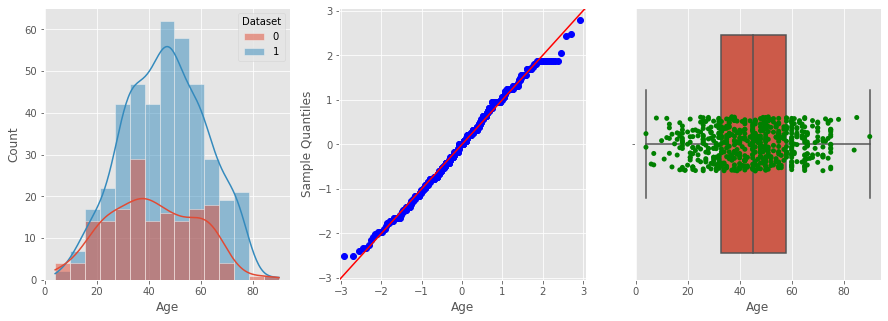

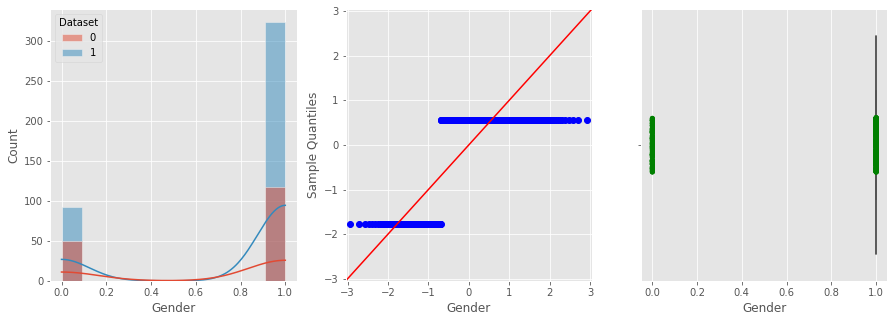

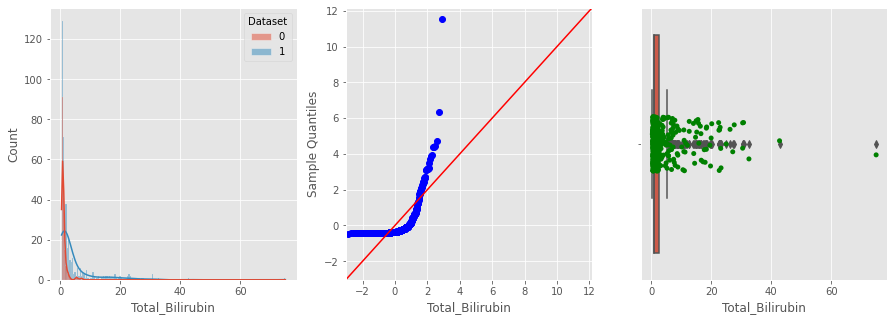

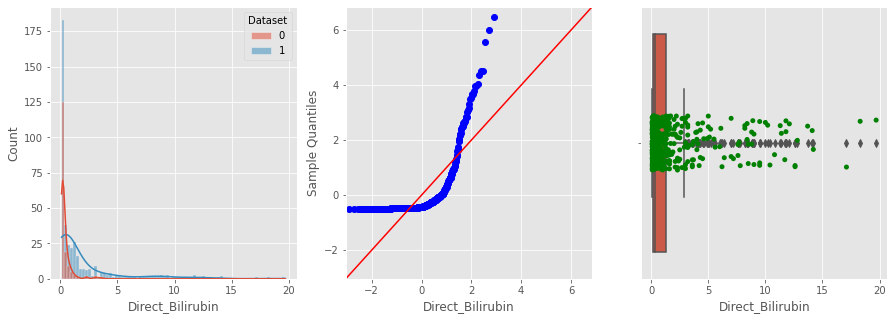

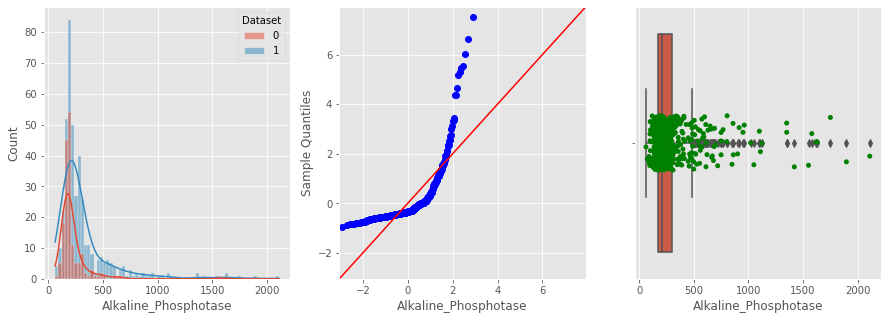

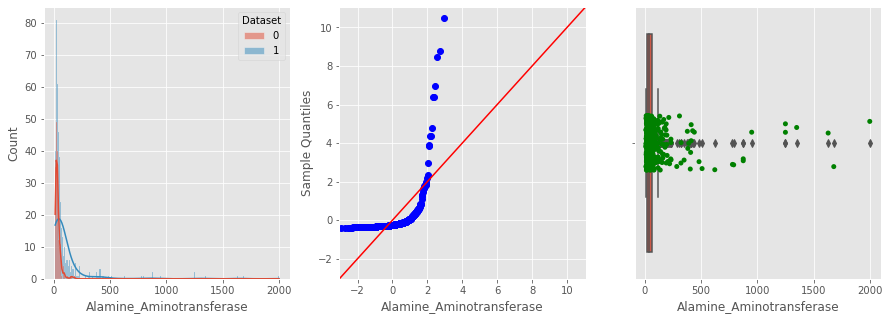

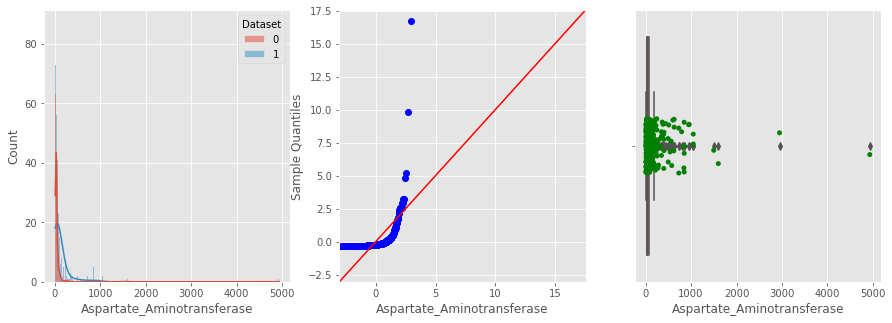

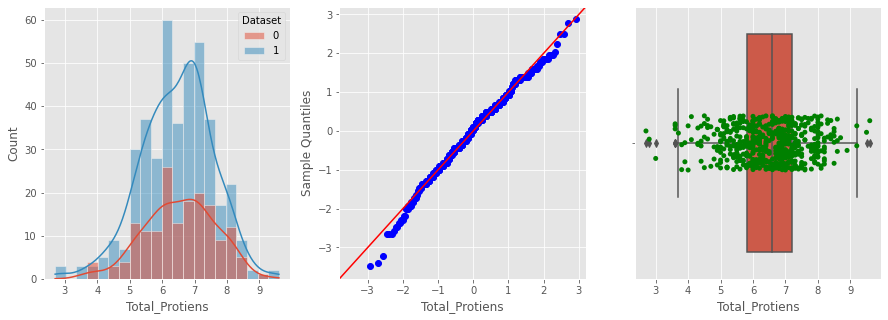

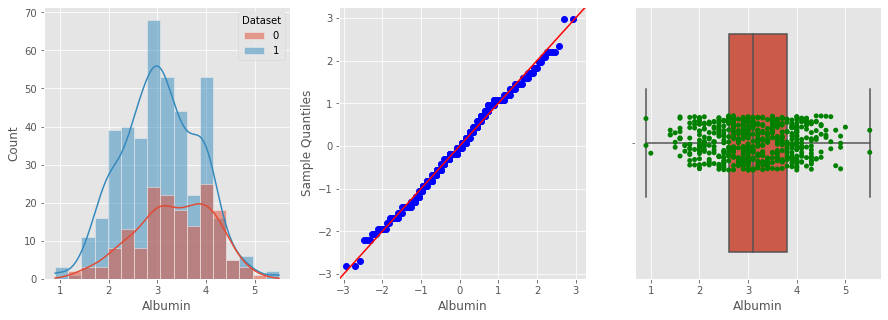

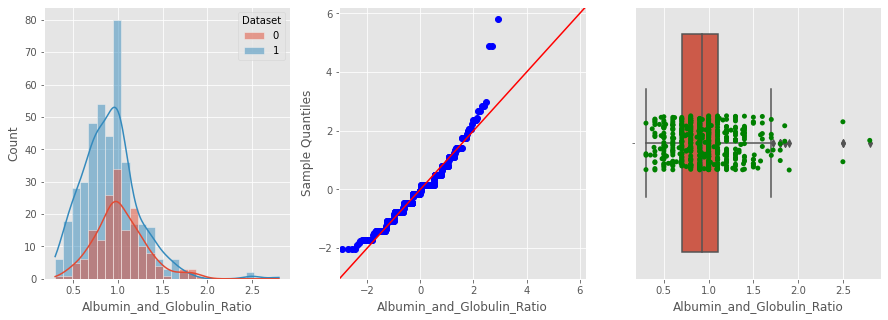

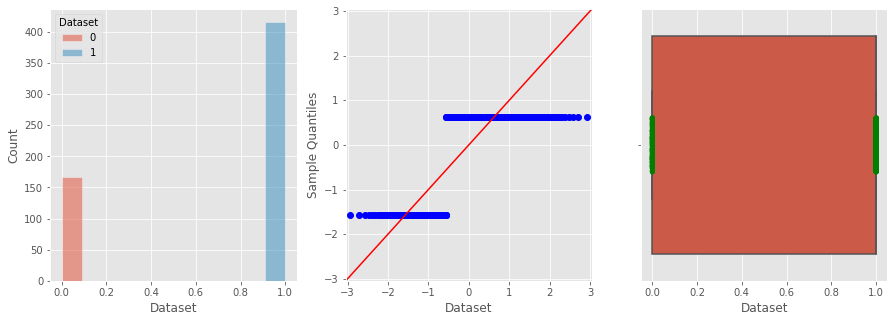

In [18]:
# Check for Normality - Visual Check - Plots not being saved.

for x in collst:
    fig,ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
    sns.histplot(data=df, x=x, kde=True, hue=huecol[0], ax=ax[0])
    sm.qqplot(df[x],ax=ax[1],line='45',fit=True)
    ax[1].set_xlabel(x)
    sns.boxplot(data=df,x=x,ax=ax[2])
    sns.stripplot(data=df,x=x,ax=ax[2], color='green')
    plt.show()

#### Feature vs Target Box Plot

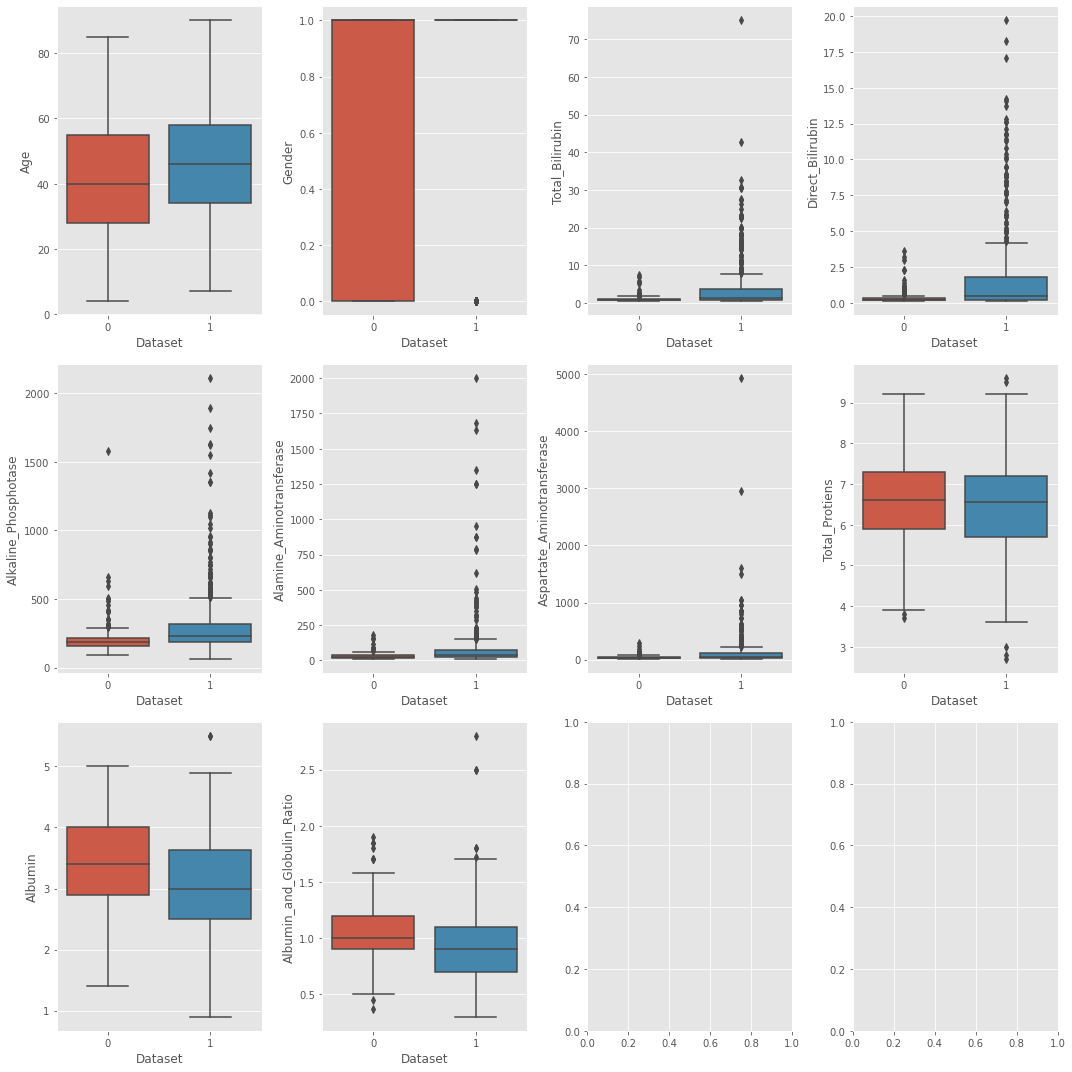

In [19]:
# Box Plot

if len(y_catlst)!= 0:
    NCOLS = 4
    m_rows = int(np.ceil((len(collst)-len(y_catlst))/NCOLS))
    fig, axes = plt.subplots(m_rows, NCOLS, figsize = (15,15))
    axes = axes.flatten()
    for lst in range(0, len(y_catlst), 1):
        temp = 'Fig_0' + str(lst)
        FIG1 = f"{temp}_Boxplot"
        for i in range(0,len(df.columns)-len(y_catlst)):
            sns.boxplot(x=y_catlst[lst], y=df.iloc[:,i], data=df, orient='v', ax=axes[i])
            plt.tight_layout()
if len(y_catlst)== 0:
    FIG1 = r"Fig_01_Boxplot"
    lst = [x for x in collst if x not in y_catlst]
    fig, axes = plt.subplots(1, len(lst), figsize = (45,15))
    axes = axes
    for i, col in enumerate(lst):
        ax = sns.boxplot(y=df[col], ax=axes.flatten()[i])
        axminlt = df[col].min()-0.1*df[col].min()
        axmaxlt = df[col].max()+0.1*df[col].max()
        ax.set_ylim(axminlt, axmaxlt)
        ax.set_ylabel(col)
    plt.tight_layout()

#### Scatter Plots - Optional

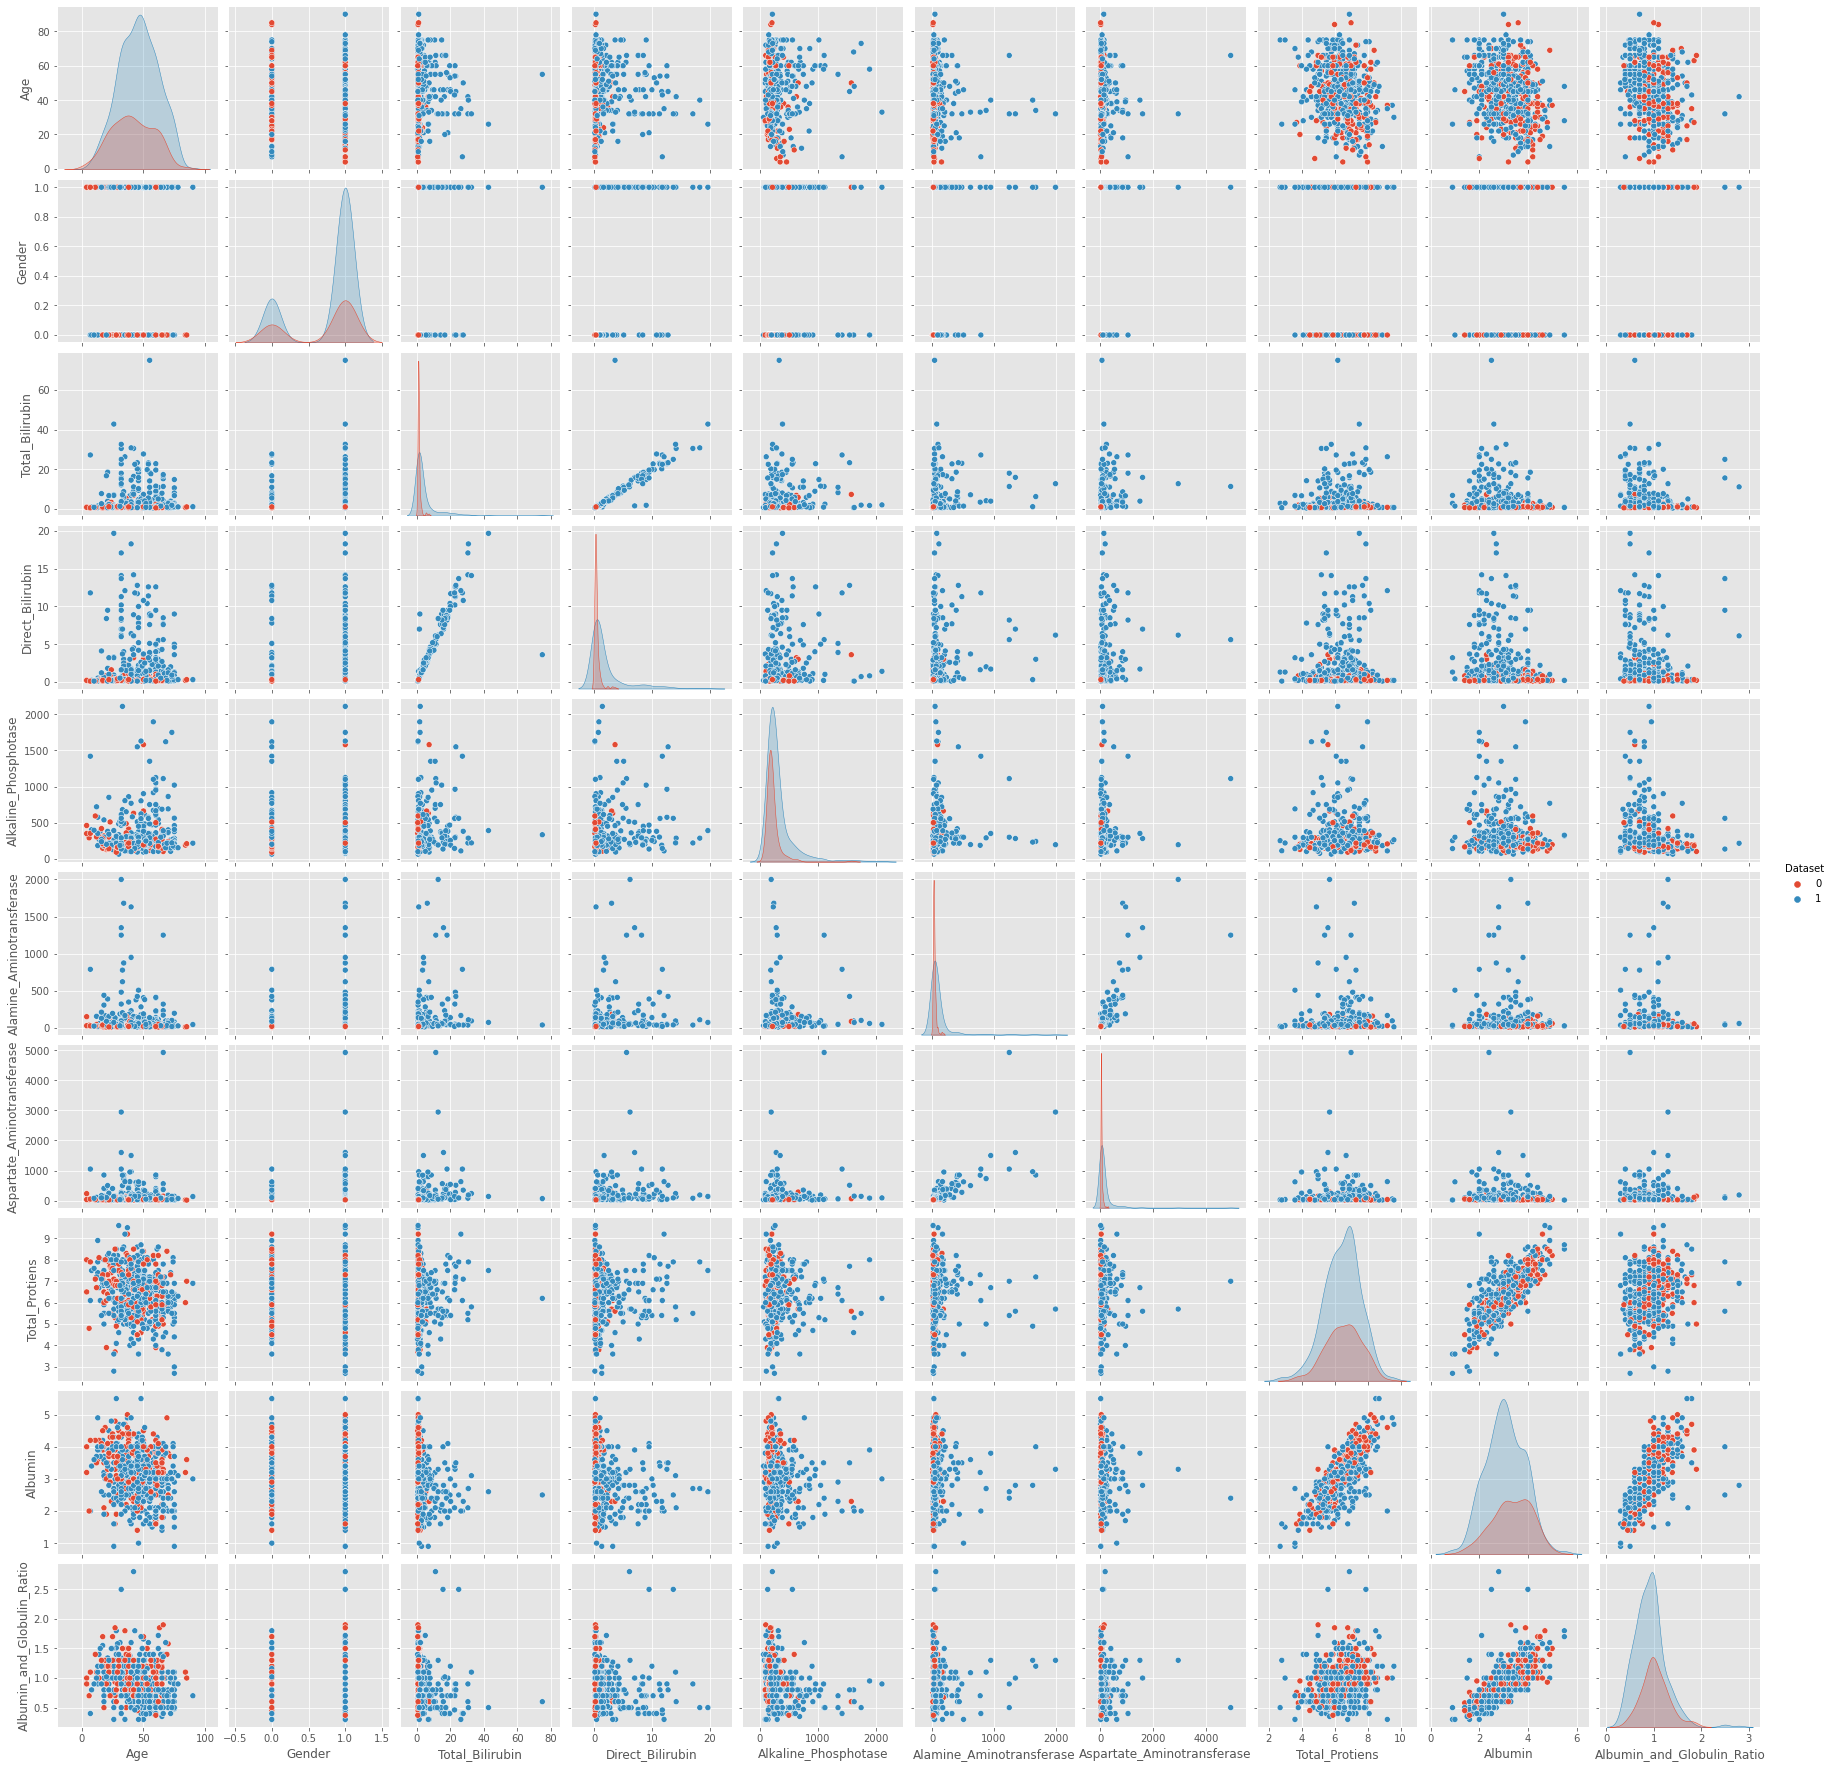

In [20]:
# Scatter Plot - Full Dataset

if len(collst) < 12:
    sns.pairplot(df, hue=huecol[0])
else:
    print("Large Feature Set - Refer Scatter Plots with Columns of Interest")

#### Correlation Heatmaps

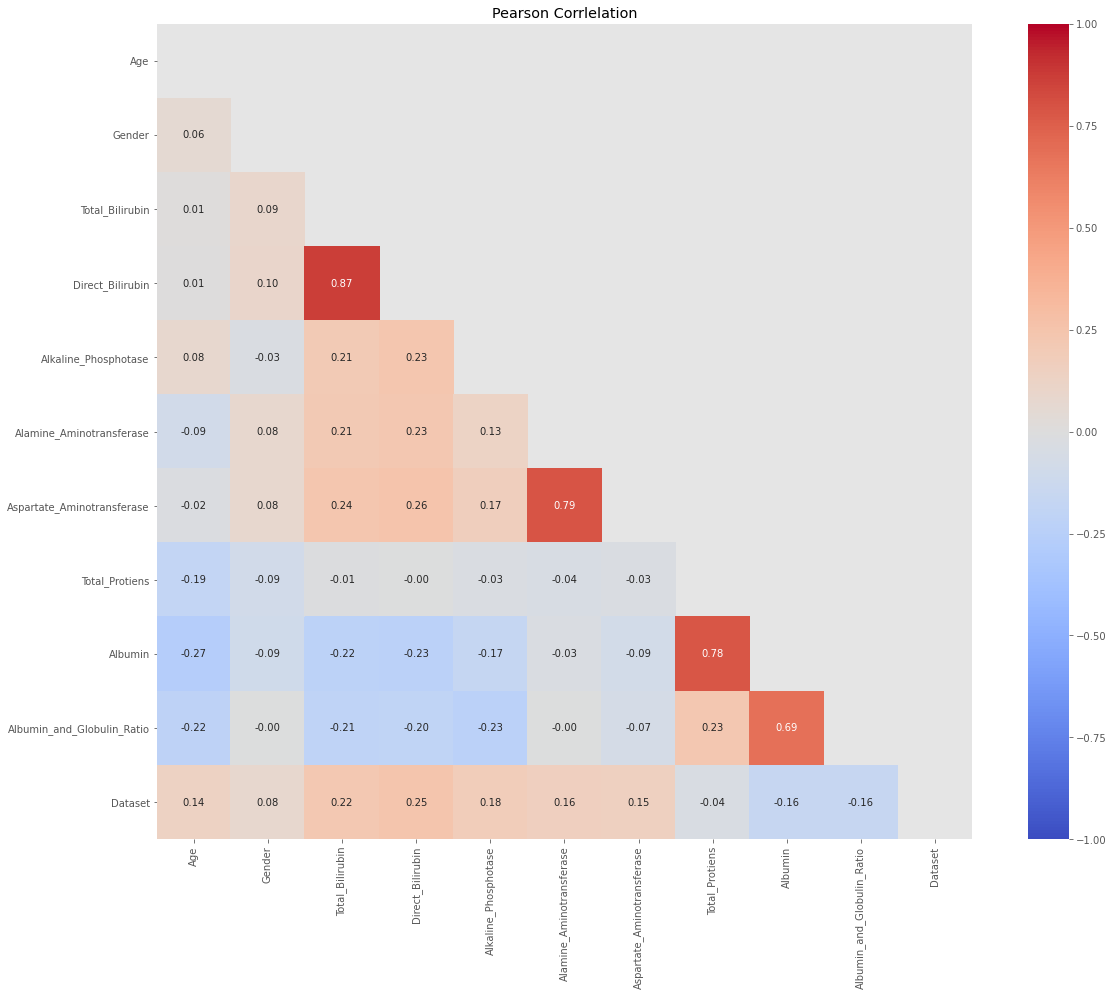

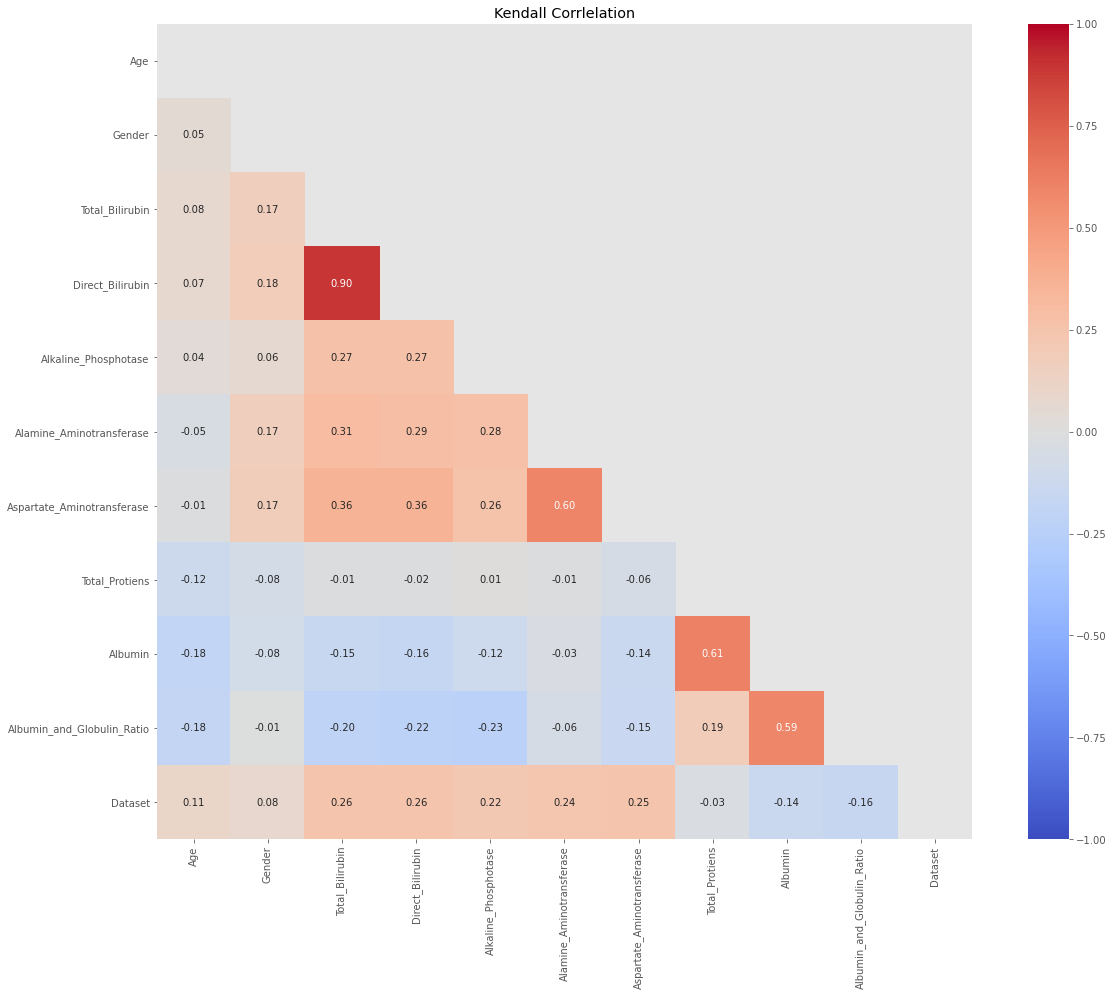

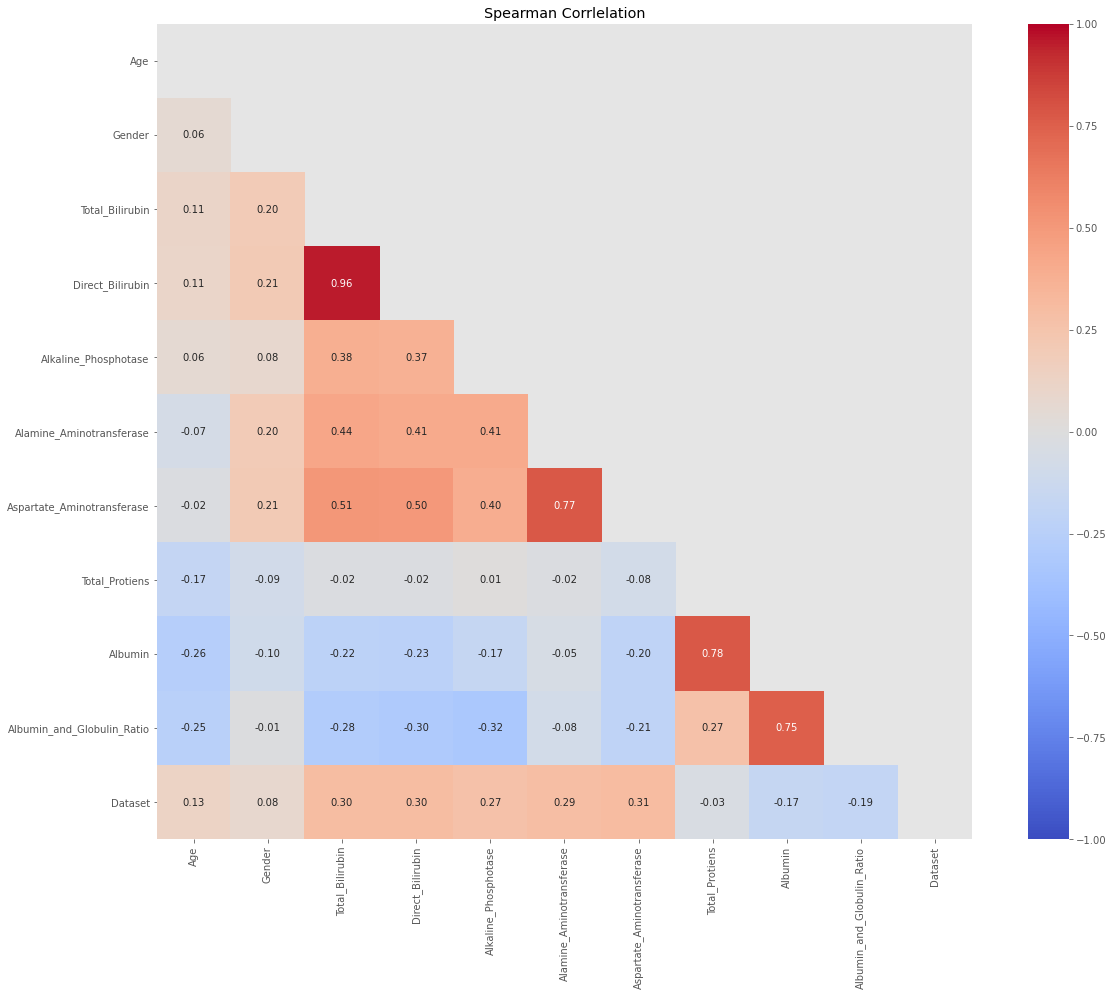

In [21]:
# Linear Correlation Heatmap

cormethod = {0:'pearson', 1:'kendall', 2:'spearman'}
for i in range(0, 3, 1):
    temp = 'linear_cor' + str(i)
    temp = df.corr(method=cormethod[i])
    ftemp = cormethod[i].title()
    FIG2 = r"Fig_02_Corr_"
    mask = np.zeros(temp.shape, dtype=bool)
    mask[np.triu_indices(len(mask))] = True
    plt.subplots(figsize=(20,15))
    plt.title(f"{ftemp} Corrlelation")
    sns.heatmap(temp, annot=True, vmin=-1, vmax=1, center=0,
                cmap='coolwarm', square=True, mask=mask, fmt='.2f')
    plt.show()

#### Non-Linear Correlation Heatmaps

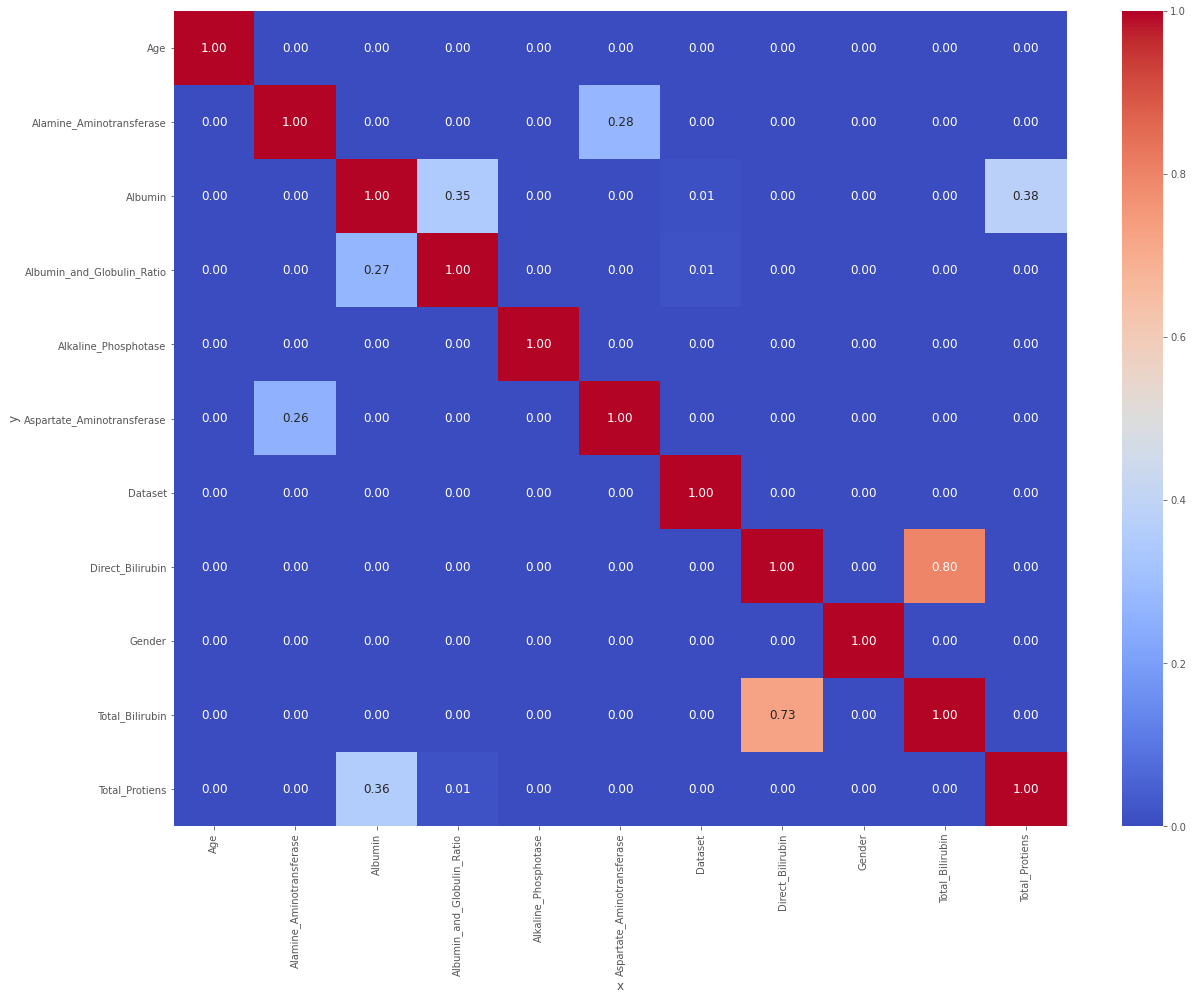

In [22]:
# Non-Linear Correlation Predictive Power Score - Heatmap

FIG3 = r"Fig_03_Predictive_Power_Score"

ppscorr = pps.matrix(df) # Predictive Power Score - PPS
matrix_df = pps.matrix(df)[['x', 'y', 'ppscore']].pivot(columns='x', index='y',
                                                        values='ppscore')
plt.subplots(figsize=(20,15))
sns.heatmap(matrix_df, cmap="coolwarm", annot=True, linewidth=0, annot_kws={"size":12}, fmt='.2f')
plt.show()

#### VIF

In [23]:
# Feature Reduction -  Variance Inflation Factor [VIF]

vif_data = pd.DataFrame()
vif_data["Feature"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]

In [24]:
print("------ Variance Inflation Factor ------")

------ Variance Inflation Factor ------


In [25]:
vif_data.head(len(collst)).round(decimals=2)

,Feature,VIF
0,Age,8.03
1,Gender,4.11
2,Total_Bilirubin,5.48
3,Direct_Bilirubin,5.76
4,Alkaline_Phosphotase,2.69
5,Alamine_Aminotransferase,3.35
6,Aspartate_Aminotransferase,3.20
7,Total_Protiens,105.73
8,Albumin,135.28
9,Albumin_and_Globulin_Ratio,25.84


#### Feature Scaling

In [26]:
if n_target == 0:
    X = df.copy()
else:
    X = df.drop(columns=targlst)
    y = df.filter(targlst, axis=1)

scaler = StandardScaler()
# scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

#### Principal Component Analyses

In [27]:
# Principal Component Analyses

# sklpca = SKLPCA(n_components=X.shape[1], svd_solver='full', random_state=RND_STATE)
sklpca = SKLPCA(n_components=0.95, svd_solver='full', random_state=RND_STATE)
sklpca.fit(X_scaled)
X_transform = sklpca.transform(X_scaled)

pricom = pd.DataFrame(sklpca.components_.round(3)) # Principal Components
pricomvar = pd.DataFrame(sklpca.explained_variance_ratio_.round(3))

n_pcs = pricom.shape[0] # Number of Components
topfeat = [np.abs(sklpca.components_[i]).argmax() for i in range(n_pcs)]

# Get the Feature Names
featnames = []
for columns in X.columns:
    featnames.append(columns)

topfeatname = [featnames[topfeat[i]] for i in range(n_pcs)]
dic = {'PC{}'.format(i+1): topfeatname[i] for i in range(n_pcs)}

# Build the dataframe
df_topfeat = pd.DataFrame((dic.items()), columns=['PC', 'Feat_Name'])
n_pca_comp = sklpca.n_components_
print("No. of Components Explaining 95% Variance:", n_pca_comp)

No. of Components Explaining 95% Variance: 7


In [28]:
# Top 10 Features from PCA

In [29]:
df_topfeat.head(10)

,PC,Feat_Name
0,PC1,Albumin
1,PC2,Albumin
2,PC3,Alamine_Aminotransferase
3,PC4,Gender
4,PC5,Age
5,PC6,Alkaline_Phosphotase
6,PC7,Albumin_and_Globulin_Ratio


#### Scatter Plot - Columns of Interest 

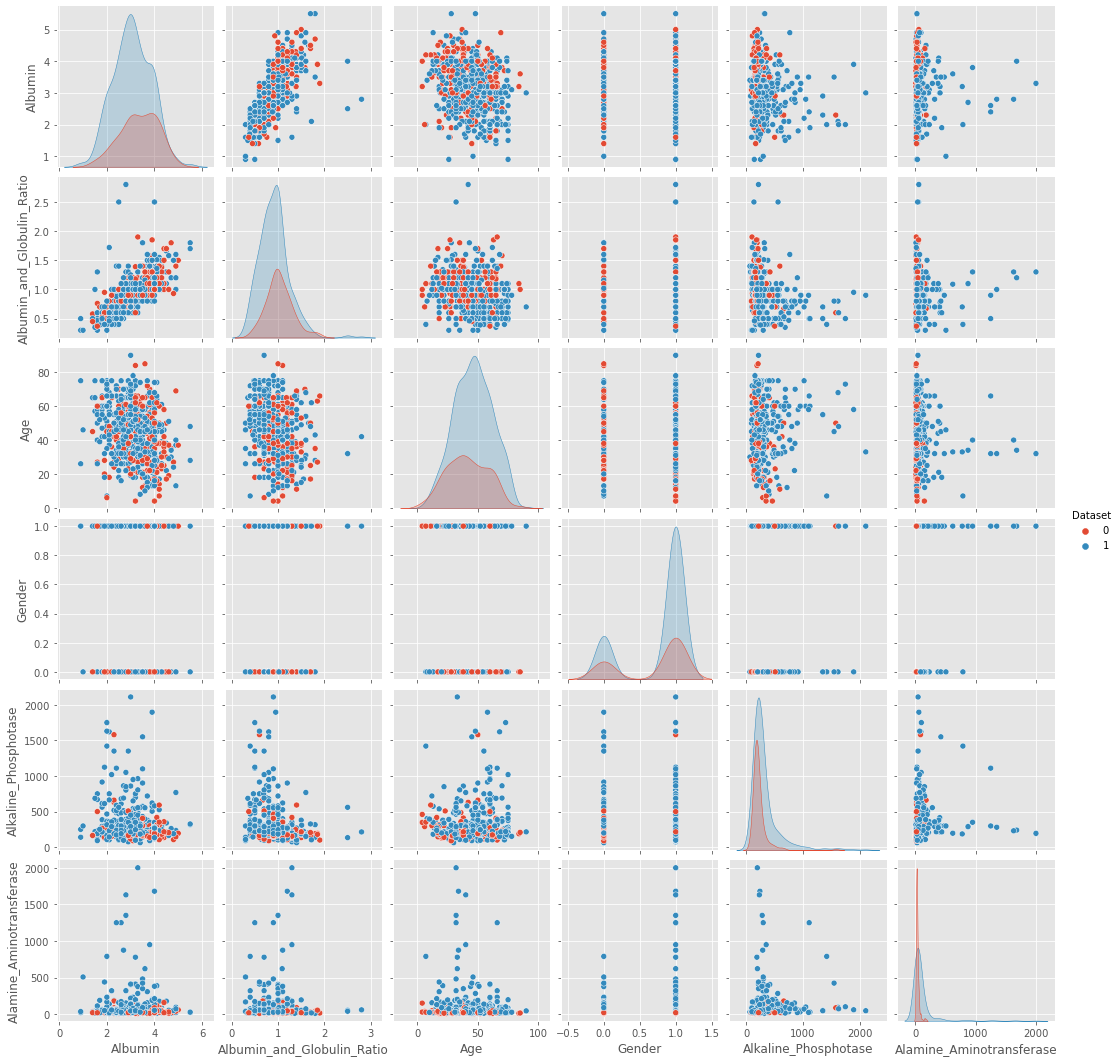

In [30]:
colinterest = df_topfeat['Feat_Name'].to_list()
uniquelst = list(set(colinterest))

for i in range(0, len(targlst), 1):
    temp = targlst[i]
    uniquelst.append(temp)

df_scatter = df.filter(uniquelst)

sns.pairplot(df_scatter, hue=huecol[0])
plt.show()

In [31]:
# EDA Report Out

# Output to Excel

SUMMARY = r"Summary.xlsx"

writer = pd.ExcelWriter(f"{OUTPATH}{PREFIX}{SUMMARY}", engine='xlsxwriter', options={'strings_to_numbers': True})
DF_INFO.to_excel(writer, sheet_name='Info')
desc_stat.to_excel(writer, sheet_name='Stats')
vif_data.to_excel(writer, sheet_name='VIF')
pricomvar.to_excel(writer, sheet_name='PCA_VAR')
pricom.to_excel(writer, sheet_name='PCA_Components')
df_topfeat.to_excel(writer, sheet_name='PCA_Top_Features')
writer.save()

#### Play Arena

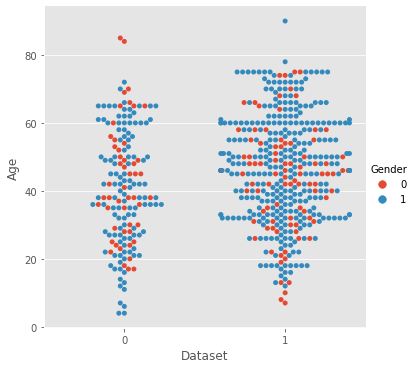

In [32]:
# Categorical Plot

sns.catplot(x='Dataset', y='Age', data=df, hue='Gender', kind='swarm')

In [34]:
NB_Convert = u" jupyter nbconvert --to html_toc --output " # Trailing space is required.
NB_Name = u"GS_EDA_V1.1_IndianLiverPatient.ipynb"
PREFIX_A = PREFIX[:-1]
HTML_Name = PREFIX_A.replace("\\", "") + " " # Trailing space is required.
Names_Concat = NB_Convert + HTML_Name + NB_Name
try:
    if(__IPYTHON__):
        get_ipython().system(Names_Concat)
except NameError:
    pass

[NbConvertApp] Converting notebook GS_EDA_V1.1_IndianLiverPatient.ipynb to html_toc
[NbConvertApp] Support files will be in EDA_V1.1_IndianLiverPatient_files\
[NbConvertApp] Making directory EDA_V1.1_IndianLiverPatient_files
[NbConvertApp] Making directory EDA_V1.1_IndianLiverPatient_files
[NbConvertApp] Making directory EDA_V1.1_IndianLiverPatient_files
[NbConvertApp] Making directory EDA_V1.1_IndianLiverPatient_files
[NbConvertApp] Making directory EDA_V1.1_IndianLiverPatient_files
[NbConvertApp] Making directory EDA_V1.1_IndianLiverPatient_files
[NbConvertApp] Making directory EDA_V1.1_IndianLiverPatient_files
[NbConvertApp] Making directory EDA_V1.1_IndianLiverPatient_files
[NbConvertApp] Making directory EDA_V1.1_IndianLiverPatient_files
[NbConvertApp] Making directory EDA_V1.1_IndianLiverPatient_files
[NbConvertApp] Making directory EDA_V1.1_IndianLiverPatient_files
[NbConvertApp] Making directory EDA_V1.1_IndianLiverPatient_files
[NbConvertApp] Making directory EDA_V1.1_IndianLi